<a href="https://colab.research.google.com/github/kingajutrzenka/ML-Bootcamp-I/blob/main/braki%20danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Braki danych**

# Biblioteki

In [ ]:
import numpy as np
import pandas as pd
import sklearn

# Dane

In [ ]:
data = {
    'size': ['L', 'M', 'XL', np.nan, 'M', 'L'],
    'color': ['green', 'red', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,NaN,no


In [ ]:
df = df_raw.copy()
df.info()
# non-null pokazuje ile danych jest NIE BRAKUJĄCYCH np. gdy non-null = 4 to brakuje 2 danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


# Sprawdzanie braków

In [ ]:
df.isnull()
# true - jest brak

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()
# ile jest braków w danej kolumnie

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [ ]:
df.isnull().sum().sum()
# łączna ilość braków dancych

np.int64(5)

In [ ]:
df.isnull().sum() / len(df)
# procentowy udział braków w danej kolumnie

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


# uzupełnienie braków - SimpleImputer

In [ ]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #uzupełniamy średniom
imputer = imputer.fit(df[['weight']])

In [ ]:
imputer.statistics_
# obliczona średnia

array([415.])

In [ ]:
df['weight'] = imputer.transform(df[['weight']])
df
# przypisujemy na stałe

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,415.0,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0) # wstawiamy stałą wartość
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['L'],
       ['M'],
       ['XL'],
       ['L'],
       ['M'],
       ['L']], dtype=object)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #najczęstsze
imputer.fit_transform(df[['size']])

array([['L'],
       ['M'],
       ['XL'],
       ['L'],
       ['M'],
       ['L']], dtype=object)

# Powtórka

In [ ]:
df = df_raw.copy()

In [ ]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [ ]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [ ]:
df[pd.isnull(df['weight'])] # wycinamy tam gdzie NaN

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,L,green,male,89.0,NaN,no


In [ ]:
df[~pd.isnull(df['weight'])] # wycinamy tam gdzie NIE NaN

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [ ]:
pd.notnull(df['weight']) # pokazuje, gdzie nie null

,weight
0,True
1,True
2,True
3,False
4,True
5,False


# metoda uzupełniania - fillna

In [ ]:
df

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,NaN,no


In [ ]:
df.fillna(value='brak')
# zastępuje NaN - brak lub co tam chcemy XD

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,brak,no


In [ ]:
df.fillna(value=0)

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,0,0.0,300.0,yes
3,0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,0.0,no


In [ ]:
df['size'] = df['size'].fillna('L')
df
#przypisuje i zastępuje

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
2,XL,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,L,green,male,89.0,NaN,no


# metoda dropna

In [ ]:
df.dropna()

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,L,green,female,199.0,500.0,yes
1,M,red,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


# Braki danych w szeregach czasowych

In [ ]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
data_range = pd.date_range(start='1/1/2020', periods=10)

df = pd.DataFrame(data=data, index=data_range)
df

,price
2020-01-01,108.0
2020-01-02,109.0
2020-01-03,110.0
2020-01-04,110.0
2020-01-05,109.0
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,112.0
2020-01-09,111.0
2020-01-10,111.0


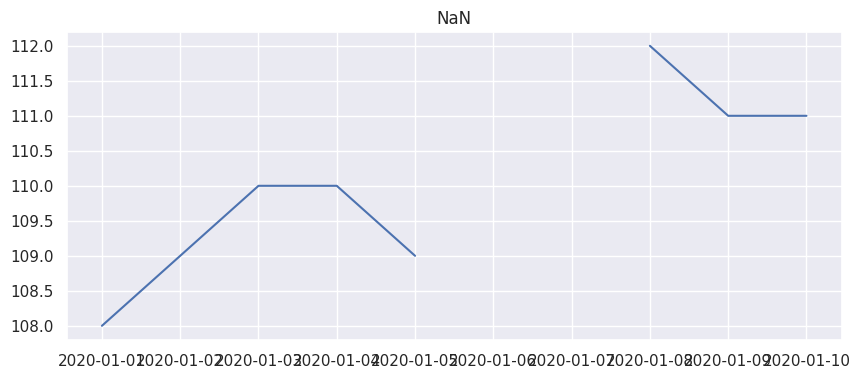

In [ ]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('NaN')
_ = plt.plot(df.price)

In [ ]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title='NaN')

# usuwanie braków mix metod

**Metoda dropna**

In [ ]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', title='NaN')

**Wypełnienie braków 0**

In [ ]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(0)
px.line(df_plotly, 'index', 'price', title='NaN')

**wstawienie średniej**

In [ ]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price', title='NaN')

**zastosowanie interpolacji - szacowanie wartości pośrednich**

In [ ]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price', title='NaN')

**wypełnienie forward fill - zastąpienie brakującej wartości ostatnią wartością**

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', ['price', 'price_fill'], title='NaN')


/tmp/ipython-input-1245524941.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



**wypełnienie backward fill**

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', ['price', 'price_fill'], title='NaN')

/tmp/ipython-input-3309542058.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

